In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
health = pd.read_excel('healthcare.xlsx')

In [3]:
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
health.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


1(a)-Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [5]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
health.shape

(303, 14)

In [7]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
health.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
health[health.duplicated(keep= False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Our Data has no Missing Values, but it has a Duplicate ROW.

1(b) Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [10]:
#Drop the Duplicate Row.
health = health.drop(164)

In [11]:
#Check size after dropping the duplicate row.
health.shape

(302, 14)

In [12]:
health[health.duplicated(keep= False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


NOW no Duplicate Values.

CONCLUSION-
1. There are no missing values in our DataFrame.
2. Thare are no Duplicates in our DataFrame.
3. Our data has 302 ROWS and 14 COLUMNS.

2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

  2.(a)Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data.

<Figure size 576x432 with 0 Axes>

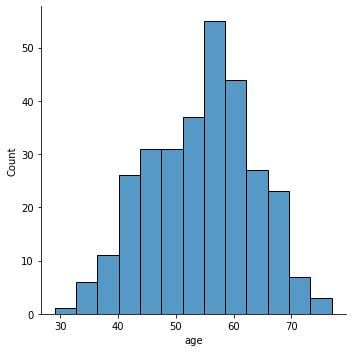

In [13]:
#Check the Distribution of Age in our Data.

plt.figure(figsize= (8,6))

sns.displot(data= health, x= "age")

plt.show()

* Age is Continuous Feature and Normally Distributed. 

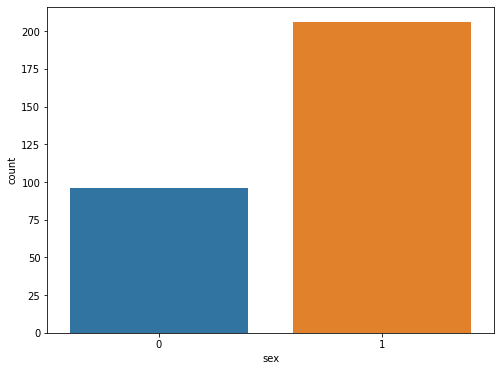

In [14]:
#Check Sex column usng Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "sex")

plt.show()

In [15]:
health["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

* 0 is for FEMALE and 1 is for MALE
* Here we can see that we have twice the number of observations for MALE than FEMALE. 

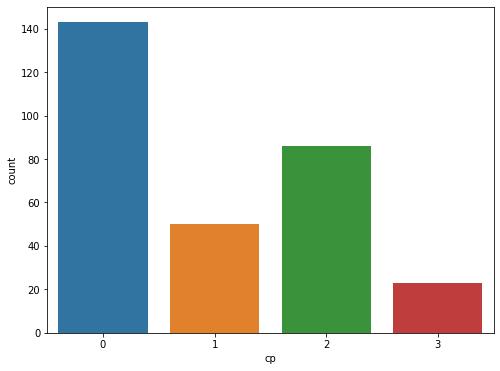

In [16]:
#Check CP column (Chest Pain) using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "cp")

plt.show()

In [17]:
health["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

* Chest Pain (cp): seems to be ordinal Categorical Variable.

<Figure size 576x432 with 0 Axes>

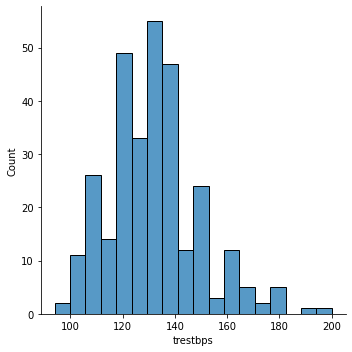

In [18]:
#Check trestbps column using Distribution Plot.

plt.figure(figsize= (8,6))

sns.displot(data= health, x= "trestbps")

plt.show()

* Resting Blood Pressure(trestbps) is Continuous and seems to be Normally Distributed with Some Outliers at Right Tail.

<Figure size 576x432 with 0 Axes>

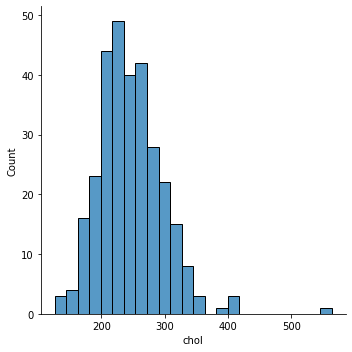

In [19]:
#Check chol column using Distribution Plot.

plt.figure(figsize= (8,6))

sns.displot(data= health, x= "chol")

plt.show()

* Here we can see that Cholestrol(chol) is Continuous and Normally Distributed with some Outliers on the Right.

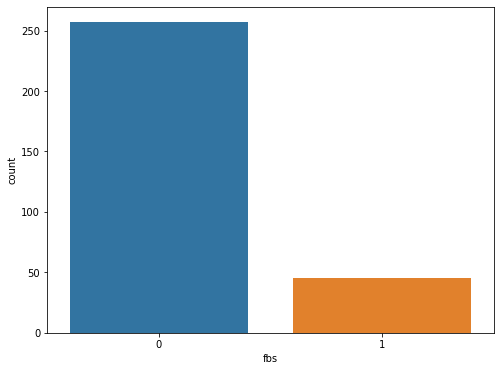

In [20]:
#Check fbs column using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "fbs")

plt.show()

In [21]:
health["fbs"].value_counts()

0    257
1     45
Name: fbs, dtype: int64

* Fasting Blood Sugar "fbs" is Ordinal Categorical Feature.

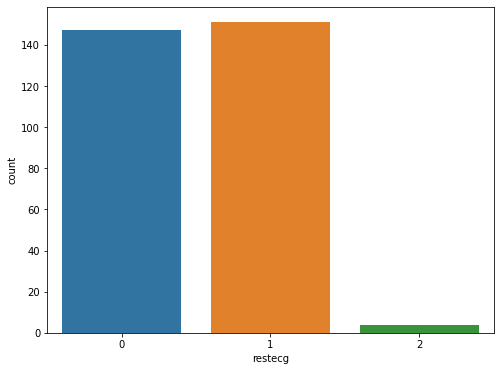

In [22]:
#Check column restecg using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "restecg")

plt.show()

In [23]:
health["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

* Resting electrocardiographic results "restecg" is Ordinal Categorical Feature.

<Figure size 576x432 with 0 Axes>

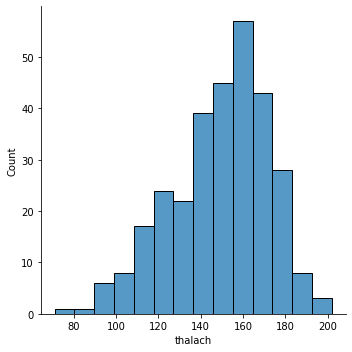

In [24]:
#Check thalac column using Distribution Plot.

plt.figure(figsize= (8,6))

sns.displot(data= health, x= "thalach")

plt.show()

* Maximum Heart Rate Achieved "thalach" is Continuous Feature and it is Left Skewed.

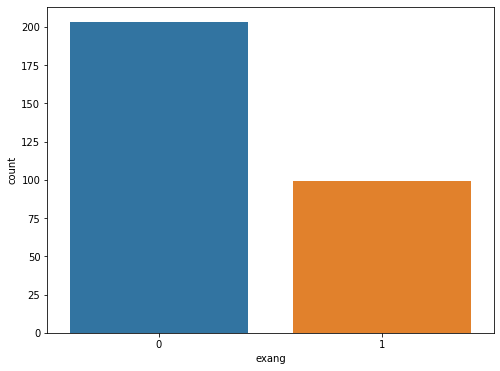

In [25]:
#Check for column exang using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "exang")

plt.show()

In [26]:
health["exang"].value_counts()

0    203
1     99
Name: exang, dtype: int64

* Exercise Induced Enigma(exang) is Categorical Feature.

<Figure size 576x432 with 0 Axes>

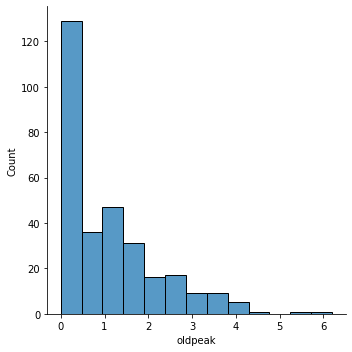

In [27]:
#Check for column oldpeak using Distribution Plot.

plt.figure(figsize= (8,6))

sns.displot(data= health, x= "oldpeak")

plt.show()

* ST depression induced by exercise relative to rest "oldpeak" is Continuous Feature and it is Highly Right Skewed.

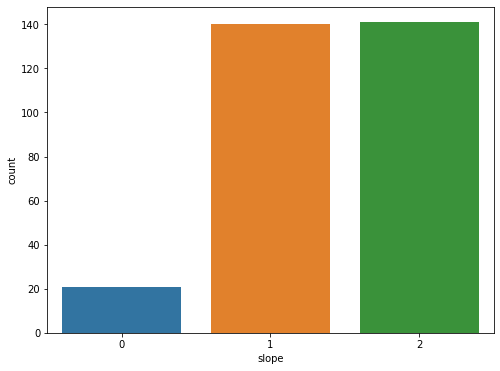

In [28]:
#Check for column slope using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "slope")

plt.show()

In [29]:
health["slope"].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

* Slope of the peak exercise ST segment "slope" is Ordinal Categorical Feature.

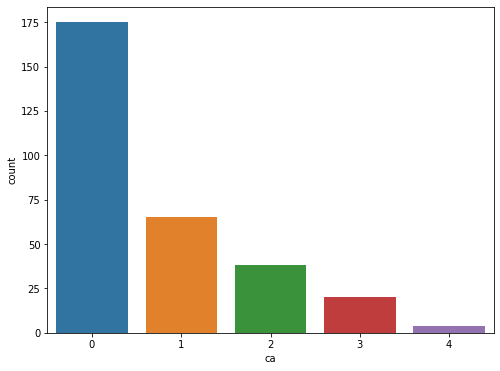

In [30]:
#Check for column 'ca' using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "ca")

plt.show()

In [31]:
health["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

* Number of major vessels (0-3) colored by fluoroscopy "ca" is Ordinal Categorical Feature.

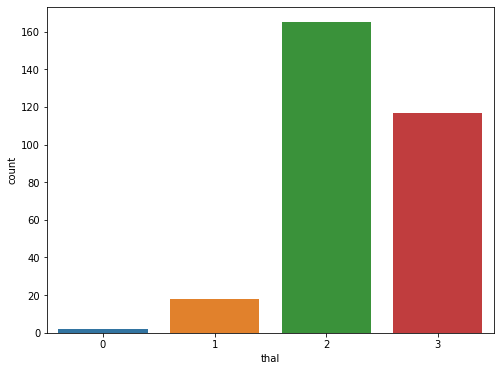

In [32]:
#Check for column 'thal' using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "thal")

plt.show()

In [33]:
health["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

* Thalassaemia "thal" is Nominal Categorical Variable.

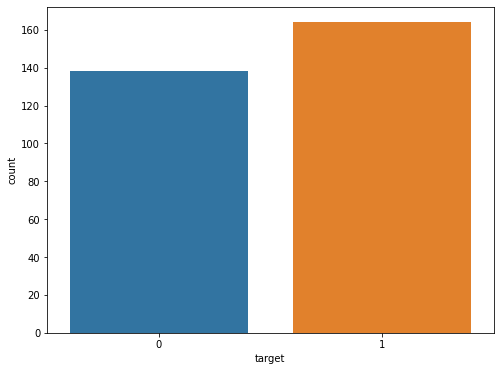

In [34]:
#Check for column 'target' using Count Plot.

plt.figure(figsize= (8,6))

sns.countplot(data= health, x= "target")

plt.show()

In [35]:
health["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

* "target" is our Target Variable and we have No Class Imbalance here.

2.(b).	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot.

In [36]:
health.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [37]:
for col in health.columns:
    print(f"Number of Unique Values in {col} : {health[col].nunique()}")

Number of Unique Values in age : 41
Number of Unique Values in sex : 2
Number of Unique Values in cp : 4
Number of Unique Values in trestbps : 49
Number of Unique Values in chol : 152
Number of Unique Values in fbs : 2
Number of Unique Values in restecg : 3
Number of Unique Values in thalach : 91
Number of Unique Values in exang : 2
Number of Unique Values in oldpeak : 40
Number of Unique Values in slope : 3
Number of Unique Values in ca : 5
Number of Unique Values in thal : 4
Number of Unique Values in target : 2


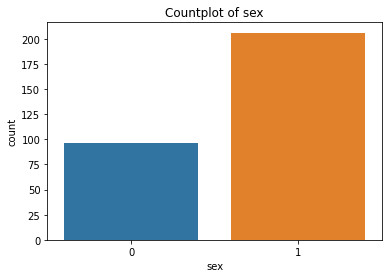

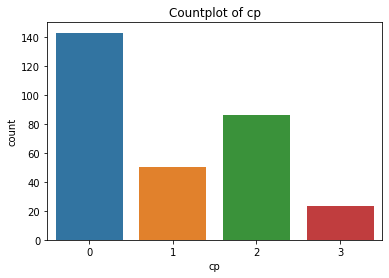

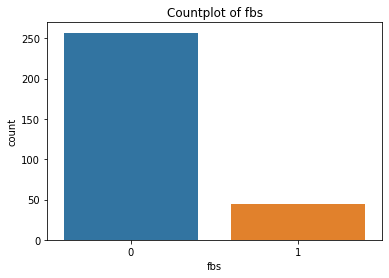

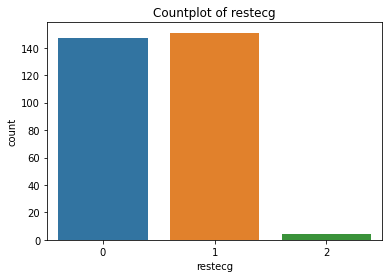

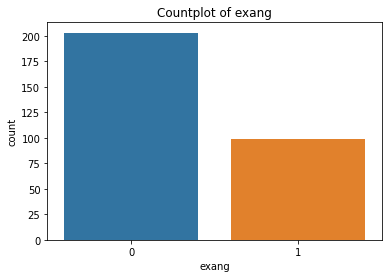

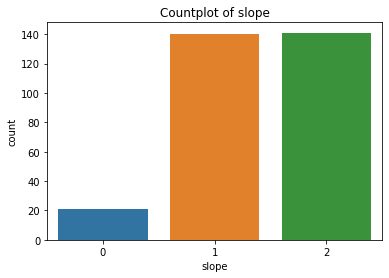

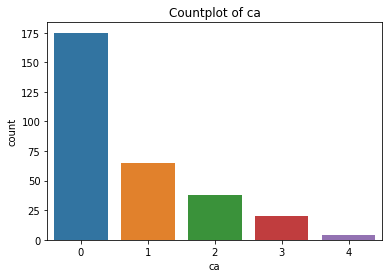

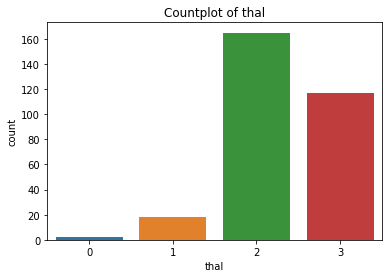

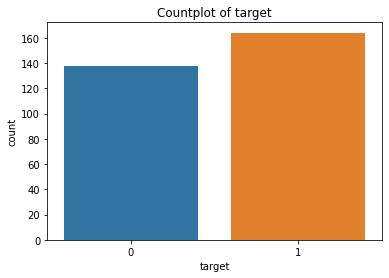

In [38]:
for col in health.columns:
   
    if health[col].nunique() <= 5:
        
        plt.figure(figsize= (6,4))

        sns.countplot(data= health, x= col)
        
        plt.title(f"Countplot of {col}")

        plt.show()

2.(c).	Study the occurrence of CVD across the Age category

<Figure size 576x432 with 0 Axes>

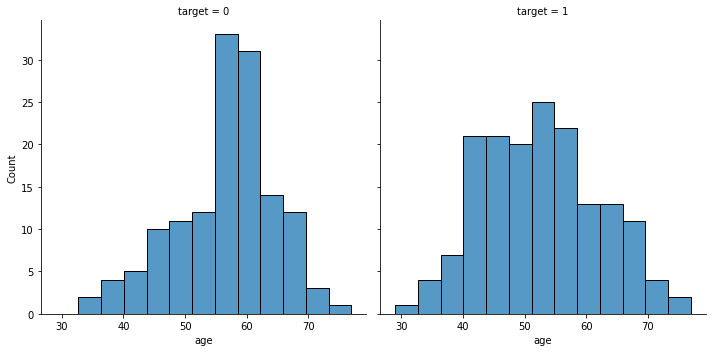

In [39]:
plt.figure(figsize= (8,6))

sns.displot(data= health, x= "age", col= "target")

plt.show()

* 40-70 seems to be the Age range Where there are more chances of Cardiovascular Diseases.
* Although, looking at target= 0 graph, 55-62 seems to be the Age Range in which Amny Observations from Our Data have no CVD.
* Also, CVD seems to be present in all Age Ranges in our Data, which can be a Cause of Concern.

2.(d). Study the composition of all patients with respect to the Sex category.

In [40]:
# We will Compare Features of all Observations with respect to Gender.

<Figure size 432x288 with 0 Axes>

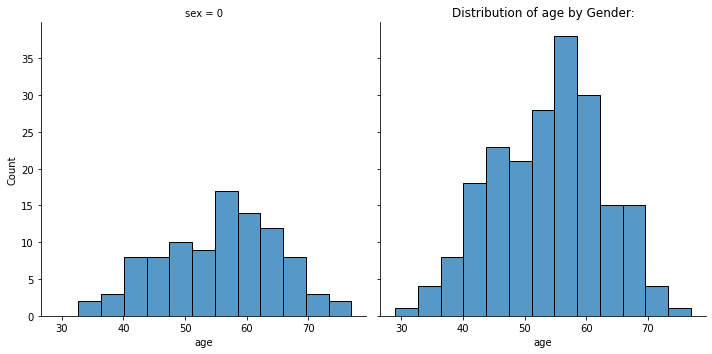

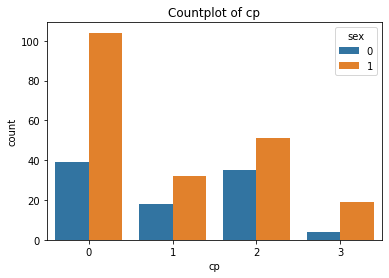

<Figure size 432x288 with 0 Axes>

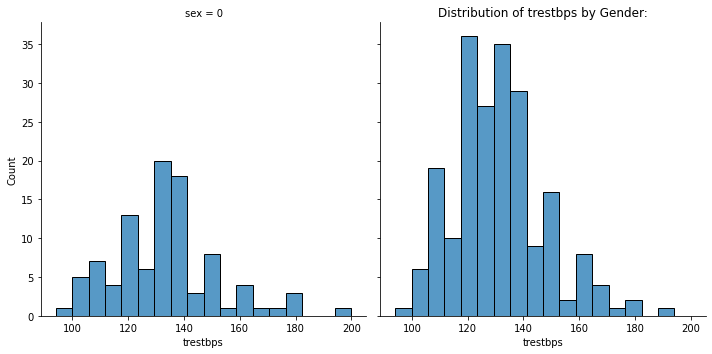

<Figure size 432x288 with 0 Axes>

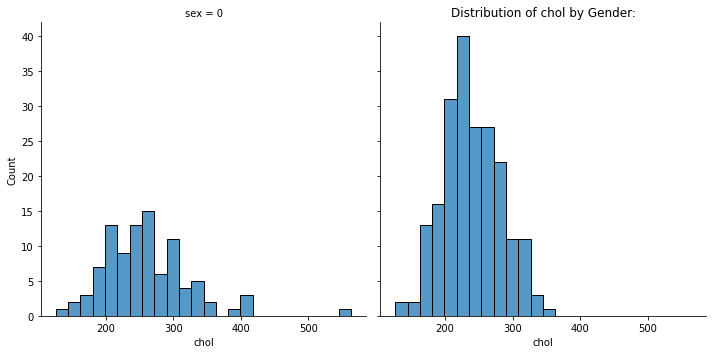

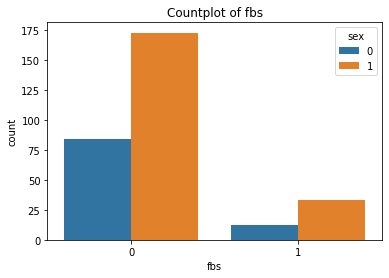

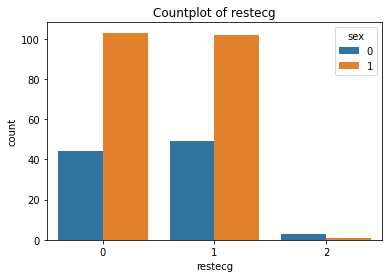

<Figure size 432x288 with 0 Axes>

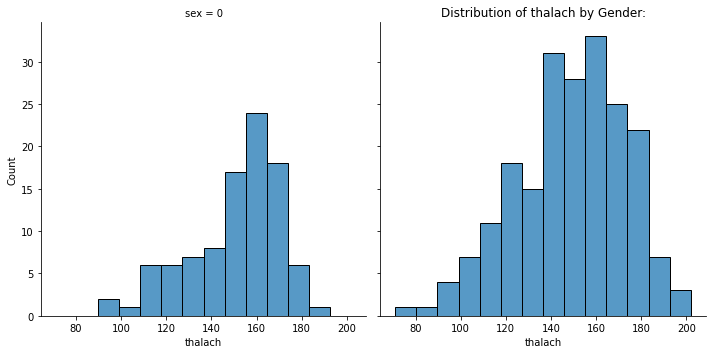

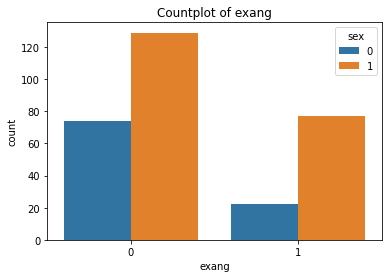

<Figure size 432x288 with 0 Axes>

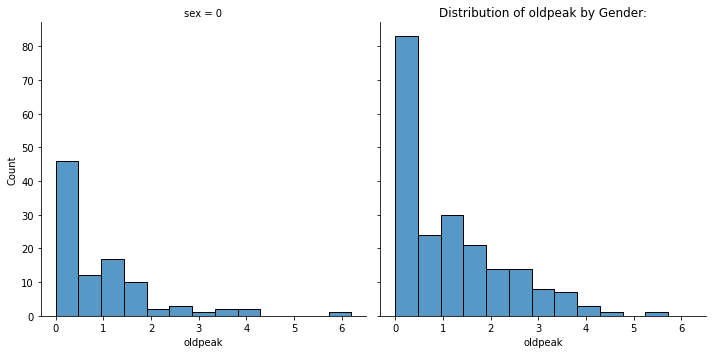

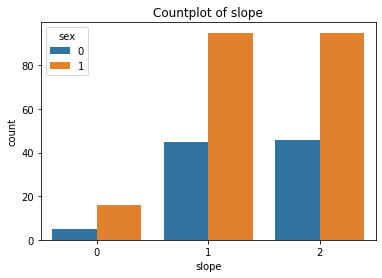

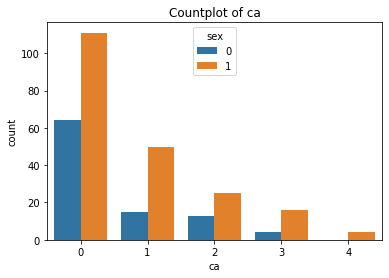

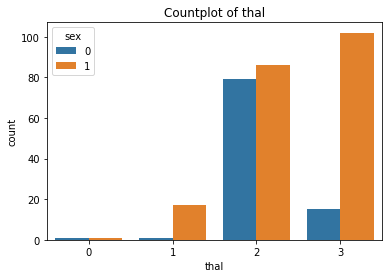

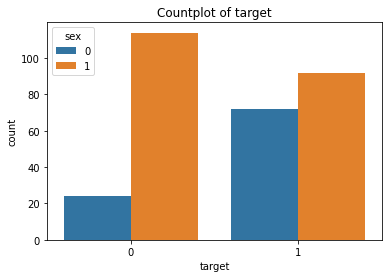

In [41]:
for cols in health.drop("sex",axis= 1).columns:
    
    if health[cols].nunique() <= 5:
        
        plt.figure(figsize= (6,4))

        sns.countplot(data= health, x= cols, hue= "sex")
        
        plt.title(f"Countplot of {cols}")

        plt.show()
        
    else:
        
        plt.figure(figsize= (6,4))

        sns.displot(data= health, x= cols, col= "sex")
        
        plt.title(f"Distribution of {cols} by Gender:")

        plt.show()
        

2.(e).Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<Figure size 432x288 with 0 Axes>

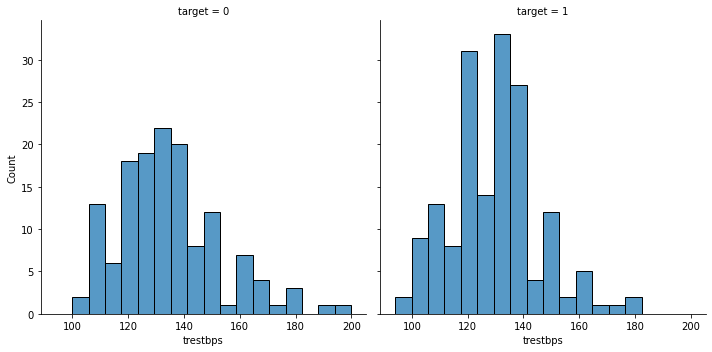

In [42]:
plt.figure(figsize= (6,4))

sns.displot(data= health, x= "trestbps", col= "target")

plt.show()

* We have some observations with very High Resting Blood Pressure values without occurence of CVD.
* In general, we can see that Resting Blood Pressure values from 120-160 has more chances of CVD.
* Still, This feature alone can not be said to be conclusive of CVD.

2.(f).Describe the relationship between cholesterol levels and a target variable.

<Figure size 432x288 with 0 Axes>

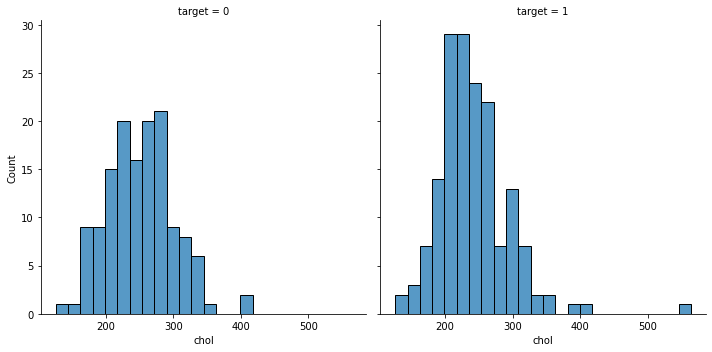

In [43]:
plt.figure(figsize= (6,4))

sns.displot(data= health, x= "chol", col= "target")

plt.show()

* Here too, No considerable conclusion can be made about CVD by Cholesterol Levels alone.

2.(g). State what relationship exists between peak exercising and the occurrence of a heart attack.

<Figure size 432x288 with 0 Axes>

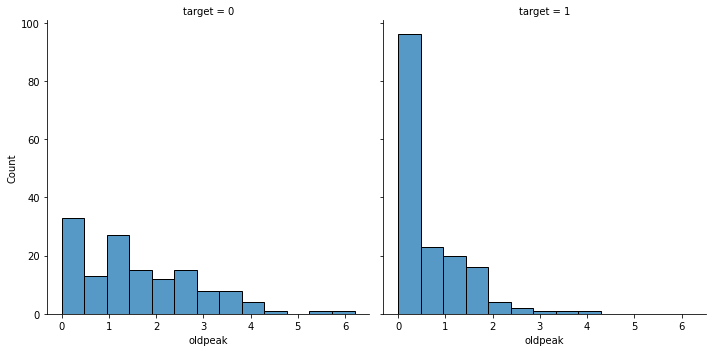

In [44]:
plt.figure(figsize= (6,4))

sns.displot(data= health, x= "oldpeak", col= "target")

plt.show()

* As can be seen above, Lower Values of ST Depression Induced by Exercise relative to Rest clearly has more chances of CVD Occurence.

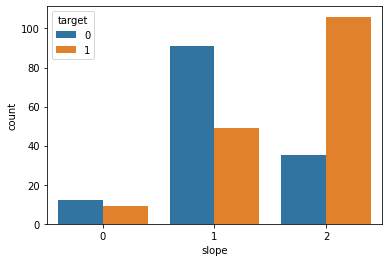

In [45]:
plt.figure(figsize= (6,4))

sns.countplot(data= health, x= "slope", hue= "target")

plt.show()

* Clear Relationship Between Slope of the Peak Exercise ST Segment and Occurence of CVD, having more value of "slope" clearly has more chances of CVD Occurence.

2.(h). Check if thalassemia is a major cause of CVD.

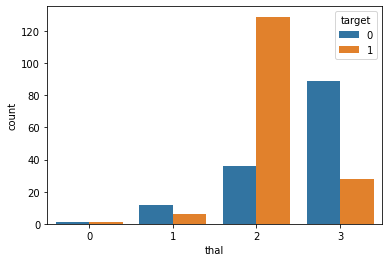

In [46]:
plt.figure(figsize= (6,4))

sns.countplot(data= health, x= "thal", hue= "target")

plt.show()

* As can be seen clearly, Thalassemia seems to be major Factor in Occurence of CVD.

2.(i). List how the other factors determine the occurrence of CVD.

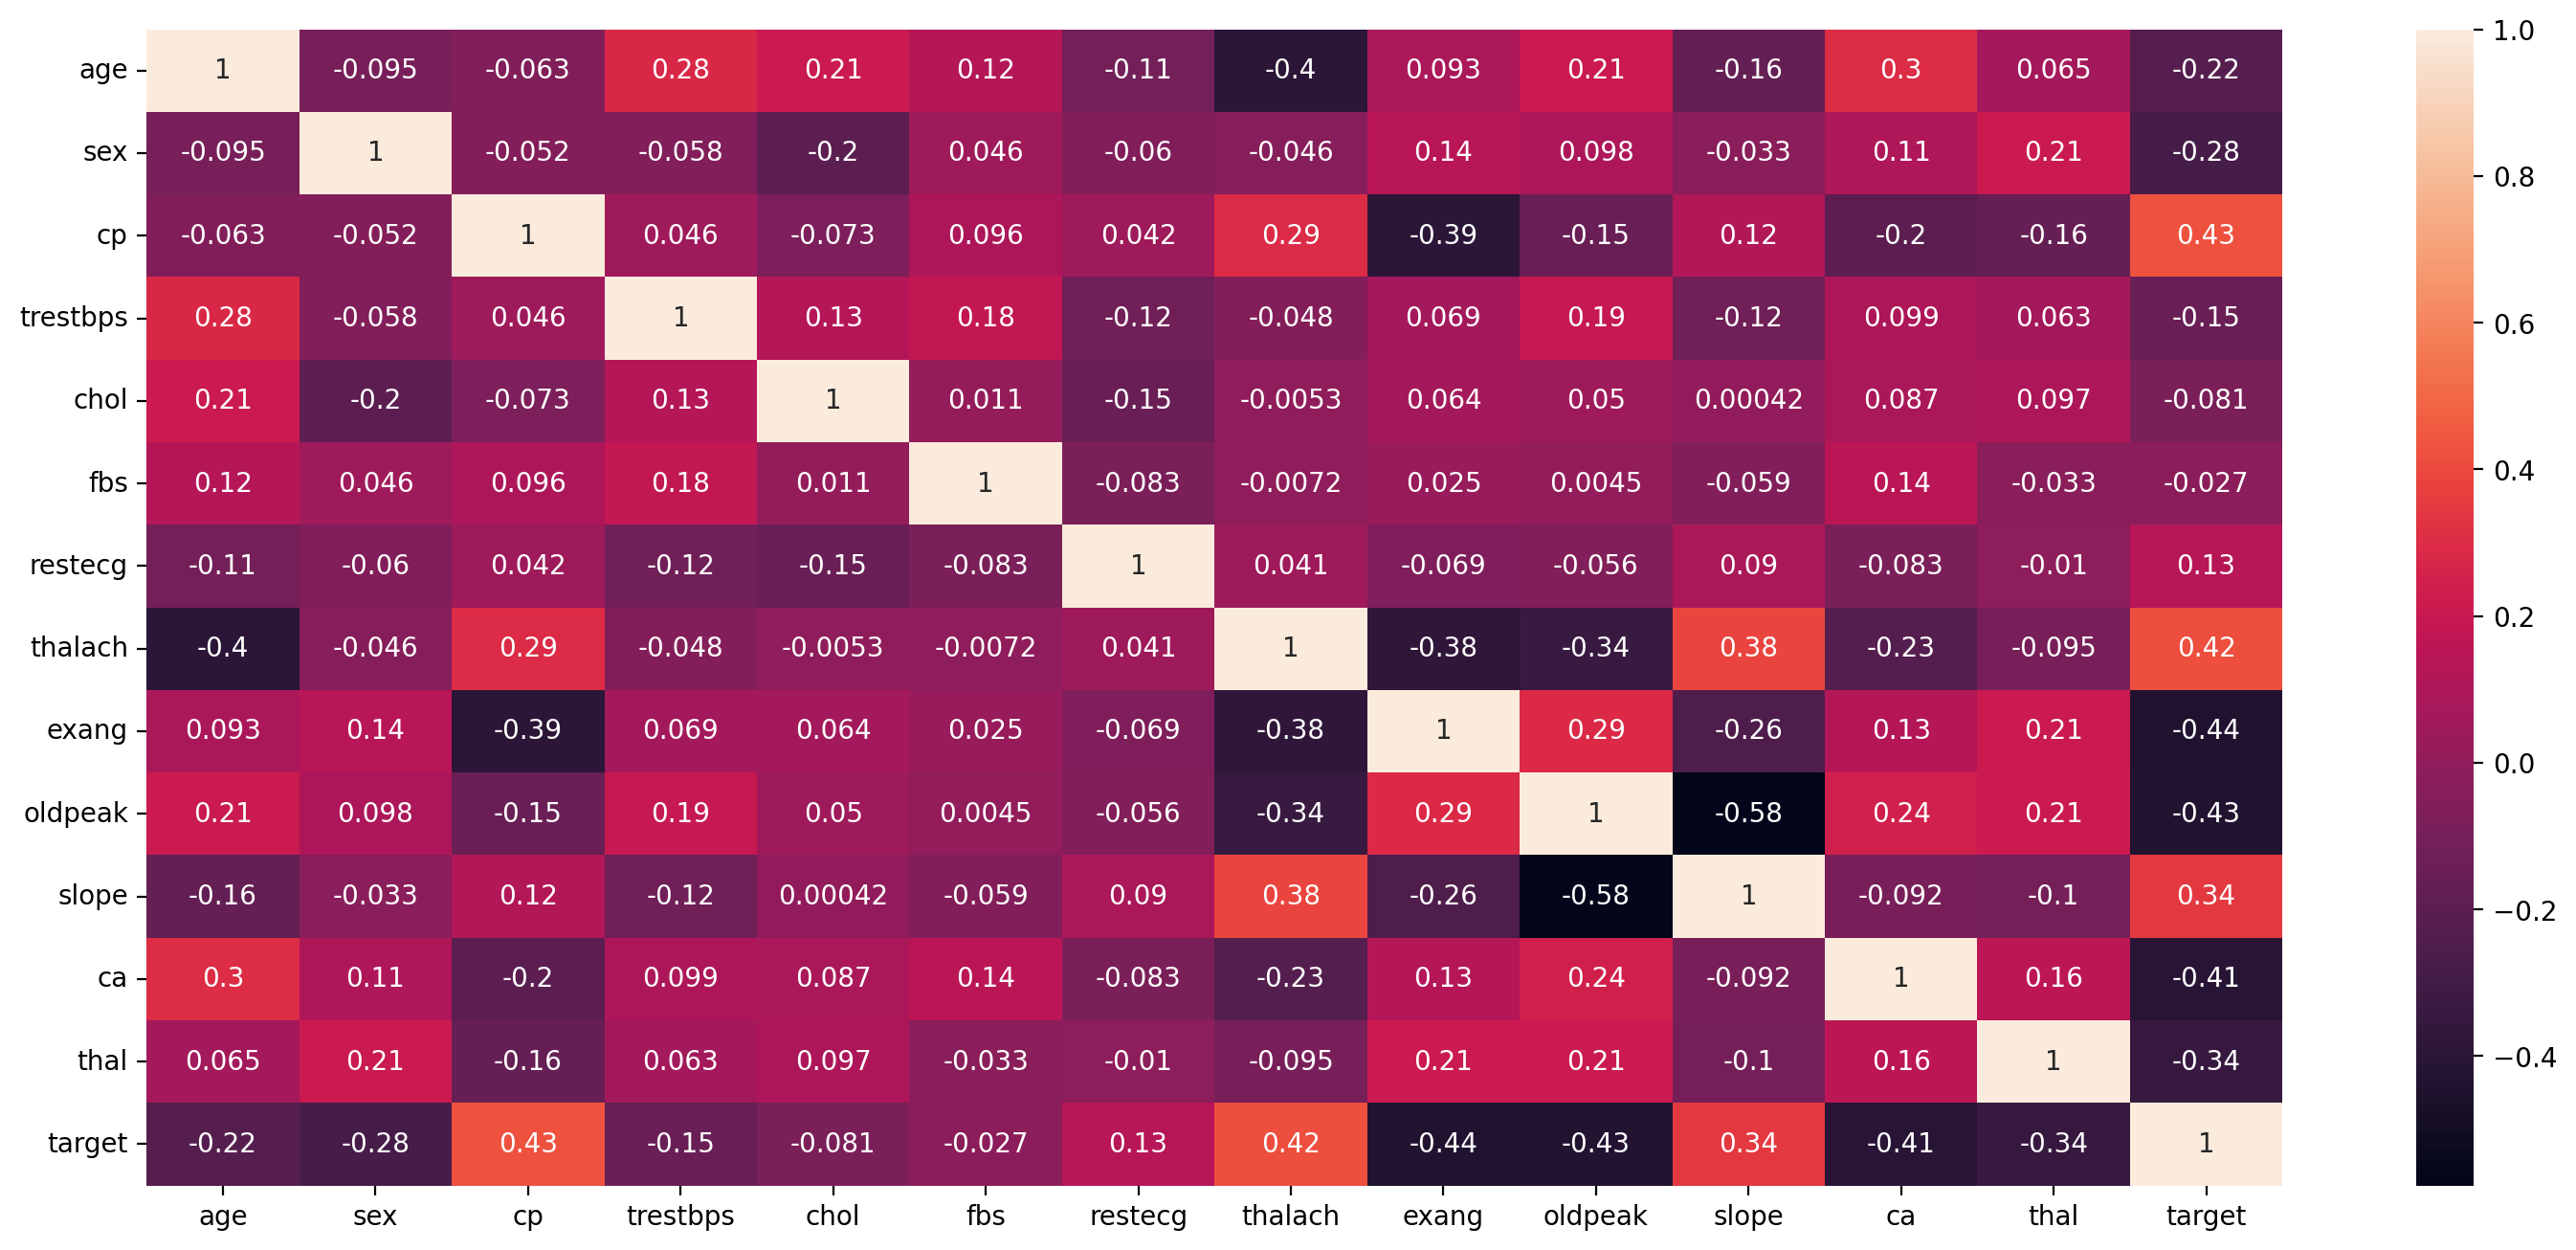

In [47]:
plt.figure(figsize= (18,8), dpi= 200)

sns.heatmap(health.corr(), annot= True)

plt.show()

* Chest Pain (cp), Maximum Heart Rate Achieved (thalach), Slope of the peak exercise ST segment (slope) have Decently High Positive Correlation with Occurence of CVD.

* Exercise Induced Enigma (exang), ST depression induced by exercise relative to rest (oldpeak), Number of major vessels (0-3) colored by fluoroscopy (ca) and 
  Thalassemia (thal) have Decently High Negative Correlation with Occurence of CVD.

* Cholesterol (chol) and Fasting Blood Sugar (fbs) have Very Low Correlation to Heart Disease.

2.(j). Use a pair plot to understand the relationship between all the given variables.

<Figure size 1200x800 with 0 Axes>

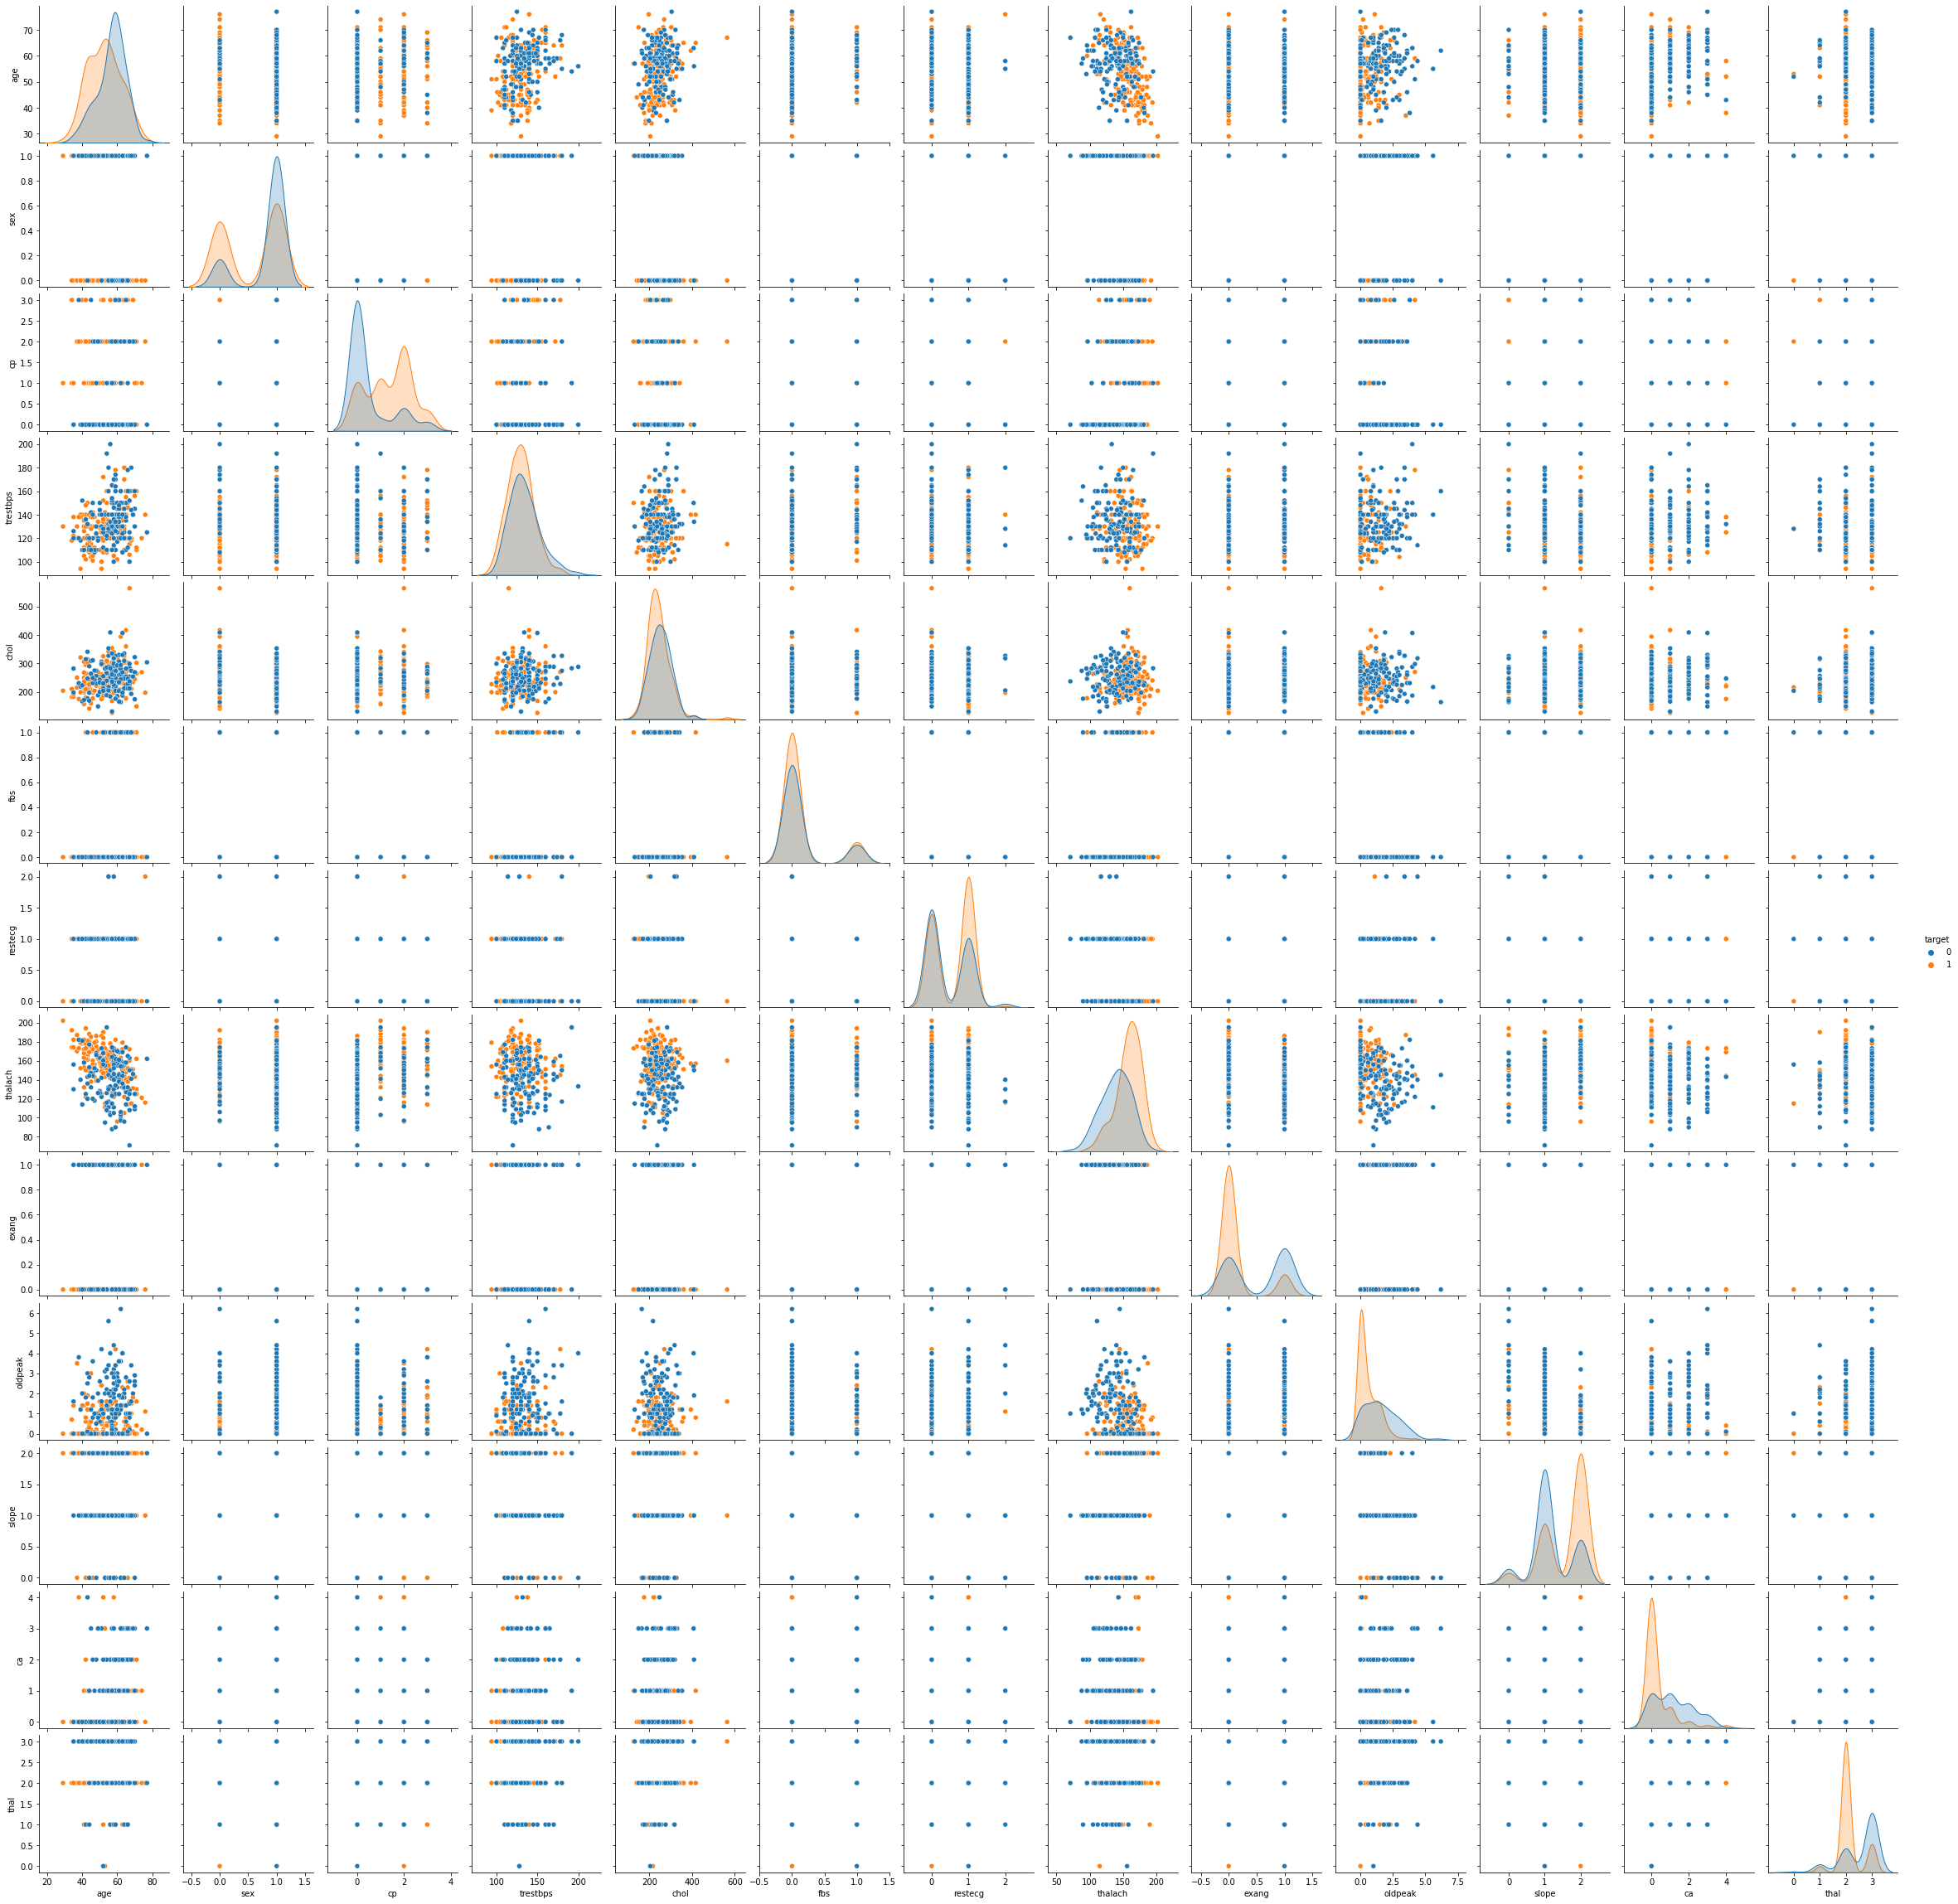

In [48]:
plt.figure(dpi= 200)

sns.pairplot(health, hue= "target")

plt.show()

* There aren't any Clearly Discernible Relationship Between any of the Features.

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection.

In [49]:
#Separate Features and Target into diffrent DataFrame.
x = health.drop("target", axis= 1)

In [50]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [51]:
x.shape

(302, 13)

In [52]:
y = health["target"]

In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [54]:
y.shape

(302,)

Using Generalized Linear Model from statsmodel library to determine which Features are Significant in Decidind Target Variable.

In [55]:
from statsmodels.api import GLM
glm_model = GLM(y, x)

In [56]:
glm_results = glm_model.fit()

In [57]:
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                            GLM   Df Residuals:                      289
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.12814
Method:                          IRLS   Log-Likelihood:                -111.63
Date:                Mon, 05 Dec 2022   Deviance:                       37.034
Time:                        14:21:57   Pearson chi2:                     37.0
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0035      0.002      1.503      0.133      -0.001       0.008
sex           -0.1706      0.047     -3.652      0.000      -0.262      -0.079
cp             0.1091      0.023      4.812      0.000       0.065       0.154
trestbps      -0.0008      0.001     -0.708      0.479      -0.003       0.001
chol          -0.0001      0.000     -0.254      0.799      -0.001       0.001
fbs            0.0084      0.060      0.139      0.889      -0.110       0.126
restecg        0.0686      0.040      1.728      0.084      -0.009       0.146
thalach        0.0050      0.001      5.605      0.000       0.003       0.007
exang         -0.1202      0.051     -2.350      0.019      -0.221      -0.020
oldpeak       -0.0526      0.023     -2.274      0.023      -0.098      -0.007
slope          0.0887      0.043      2.078      0.038       0.005       0.172
ca            -0.1120      0.023     -4.924      0.000      -0.157      -0.067
thal          -0.1021      0.036     -2.866      0.004      -0.172      -0.032
==============================================================================
"""

* There are Some Features which Have p-Value > 0.05.

* Those Features are not Significant in Predicting Target Variable.

* We will Build our Model Twice, once Using all The Features and Once Using Only Those Features deemed Significant by GLM.

Creating new Data Frame with Feature deemed Significan by GLM.

In [58]:
glm_results.pvalues

age         1.329240e-01
sex         2.602821e-04
cp          1.491747e-06
trestbps    4.789596e-01
chol        7.991127e-01
fbs         8.894247e-01
restecg     8.391343e-02
thalach     2.086209e-08
exang       1.879360e-02
oldpeak     2.297834e-02
slope       3.773797e-02
ca          8.465524e-07
thal        4.157151e-03
dtype: float64

In [59]:
glm_results.pvalues[glm_results.pvalues < 0.05]

sex        2.602821e-04
cp         1.491747e-06
thalach    2.086209e-08
exang      1.879360e-02
oldpeak    2.297834e-02
slope      3.773797e-02
ca         8.465524e-07
thal       4.157151e-03
dtype: float64

In [60]:
significant_cols = list(glm_results.pvalues[glm_results.pvalues < 0.05].index)

In [61]:
significant_cols

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [62]:
x_glm = x[significant_cols].copy()

In [63]:
x_glm.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,2
2,0,1,172,0,1.4,2,0,2
3,1,1,178,0,0.8,2,0,2
4,0,0,163,1,0.6,2,0,2


Train Test Split of Datafrmae with All Features:

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


Train Test Split of Datafrmae with GLM Features:

In [67]:
x_glm_train, x_glm_test, y_train, y_test = train_test_split(x_glm, y, test_size= 0.2, random_state= 42)

In [68]:
print(x_glm_train.shape)
print(x_glm_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 8)
(61, 8)
(241,)
(61,)


Scalling of Datafrmae with All Features:

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc_all = StandardScaler()

In [71]:
temp = sc_all.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.350641,0.731459,0.000000,-0.630711,0.927138,-0.391293,0.890028,0.549139,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
1,1.487426,0.731459,0.966493,2.753363,0.526980,2.555631,-0.991522,0.012071,1.517027,0.543474,-0.684707,-0.683490,1.140502
2,1.378270,0.731459,-0.966493,-0.348705,0.145878,2.555631,0.890028,0.593894,-0.659184,-0.715923,-0.684707,1.350103,1.140502
3,0.068393,-1.367131,0.000000,0.215308,0.069658,-0.391293,-0.991522,0.504383,-0.659184,0.363560,-0.684707,-0.683490,-0.545762
4,1.050801,0.731459,0.966493,0.497314,1.689342,-0.391293,0.890028,0.370116,-0.659184,-0.895837,0.965436,-0.683490,-0.545762


In [72]:
temp = sc_all.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.068393,0.731459,-0.966493,0.046104,2.032334,-0.391293,0.890028,-0.793531,1.517027,0.183647,-0.684707,0.333307,1.140502
1,1.050801,0.731459,0.966493,-0.348705,1.193909,-0.391293,0.890028,-0.838286,1.517027,0.723388,-0.684707,-0.683490,1.140502
2,0.286705,0.731459,0.966493,1.061326,-2.293175,2.555631,0.890028,1.041451,-0.659184,-0.715923,0.965436,0.333307,1.140502
3,1.269113,0.731459,0.000000,1.625339,-0.006563,-0.391293,0.890028,-1.330598,1.517027,-0.895837,-0.684707,2.366899,-2.232025
4,1.814896,-1.367131,0.966493,-1.194723,0.355484,2.555631,-0.991522,-0.883042,-0.659184,-0.895837,0.965436,0.333307,-0.545762


Scalling of Datafrmae with GLM Features:

In [73]:
sc_glm = StandardScaler()

In [74]:
temp = sc_glm.fit_transform(x_glm_train)
x_glm_train = pd.DataFrame(temp, columns= x_glm_train.columns)
x_glm_train.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.731459,0.000000,0.549139,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
1,0.731459,0.966493,0.012071,1.517027,0.543474,-0.684707,-0.683490,1.140502
2,0.731459,-0.966493,0.593894,-0.659184,-0.715923,-0.684707,1.350103,1.140502
3,-1.367131,0.000000,0.504383,-0.659184,0.363560,-0.684707,-0.683490,-0.545762
4,0.731459,0.966493,0.370116,-0.659184,-0.895837,0.965436,-0.683490,-0.545762


In [75]:
temp = sc_glm.transform(x_glm_test)
x_glm_test = pd.DataFrame(temp, columns= x_glm_test.columns)
x_glm_test.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.731459,-0.966493,-0.793531,1.517027,0.183647,-0.684707,0.333307,1.140502
1,0.731459,0.966493,-0.838286,1.517027,0.723388,-0.684707,-0.683490,1.140502
2,0.731459,0.966493,1.041451,-0.659184,-0.715923,0.965436,0.333307,1.140502
3,0.731459,0.000000,-1.330598,1.517027,-0.895837,-0.684707,2.366899,-2.232025
4,-1.367131,0.966493,-0.883042,-0.659184,-0.895837,0.965436,0.333307,-0.545762


** Building Logistic Regression Model and Random Forest Model:

* Logistic Regression Model Using All Features:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [77]:
log_model_all = LogisticRegression()

In [78]:
log_model_all.fit(x_train, y_train)

LogisticRegression()

In [79]:
preds = log_model_all.predict(x_test)

In [80]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



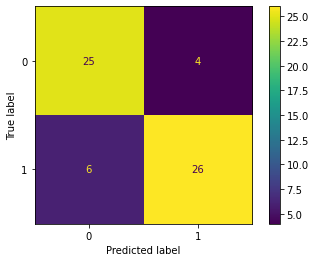

In [81]:
plot_confusion_matrix(log_model_all, x_test, y_test)
plt.show()

* Logistic Regression Model Using GLM Features:

In [82]:
log_model_glm = LogisticRegression()

In [83]:
log_model_glm.fit(x_glm_train, y_train)

LogisticRegression()

In [84]:
preds = log_model_glm.predict(x_glm_test)

In [85]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



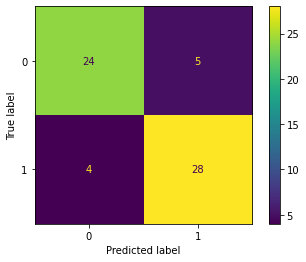

In [86]:
plot_confusion_matrix(log_model_glm, x_glm_test, y_test)
plt.show()

* Random Forest Classifier Using All Features:

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model_all = RandomForestClassifier()

rf_model_all.fit(x_train, y_train)

preds = rf_model_all.predict(x_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



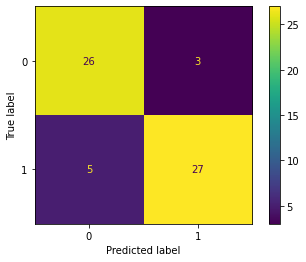

In [89]:
plot_confusion_matrix(rf_model_all, x_test, y_test)
plt.show()

* Random Forest Classifier Using GLM Features:

In [90]:
rf_model_glm = RandomForestClassifier()

rf_model_glm.fit(x_glm_train, y_train)

preds = rf_model_glm.predict(x_glm_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



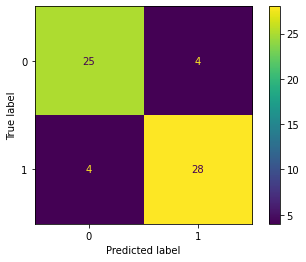

In [91]:
plot_confusion_matrix(rf_model_glm, x_glm_test, y_test)
plt.show()

* We should use Significant Features Found using GLM to Train and Build Model to Predict CVD as it uses less features to Provide same Rate of Accuracy.